# **Processamento de Imagens Digitais**

## **Laboratório 03 - Análise de Filtros espaciais - Gráficos** 
Professor: Fernando Sales. \
Alunas: Bianca Xavier, Luana Silva.

**Objetivo:** Rotina para extrair os gráficos das tabelas geradas no LAB 03 - Análise de Filtros espaciais.

Rode abaixo e selecione as tabelas das quais serão gerados os gráficos *boxplot* e *vioplot*.

In [1]:
# import the required library  
import numpy as np  
import pandas as pd 
import io 
import matplotlib.pyplot as plt  
% matplotlib inline 
from google.colab import files
import seaborn as sns

# set styles
plt.style.use('classic')
sns.set()
  
# load the dataset 
uploaded = files.upload()

Saving Metrics-of-target-with-Gaussian-11x11.csv to Metrics-of-target-with-Gaussian-11x11.csv
Saving Metrics-of-target-with-IBSF-9x9.csv to Metrics-of-target-with-IBSF-9x9.csv
Saving Metrics-of-target-with-Median-5x5.csv to Metrics-of-target-with-Median-5x5.csv
Saving Metrics-of-target-with-Moving-Average-3x3.csv to Metrics-of-target-with-Moving-Average-3x3.csv
Saving Metrics-of-target-with-Wiener-7x7.csv to Metrics-of-target-with-Wiener-7x7.csv


Rode abaixo para salvar separadamente  os gráficos *boxplot* e *vioplot* de cada métrica de cada filtro.

In [0]:
for filename in uploaded.keys():
    df = pd.read_csv(io.StringIO(uploaded[filename].decode("ISO-8859-1")), index_col = 0) # read the csv file
    df = df.head(10) #leave mean and stdDev out
    name = filename.split(sep = '.')[0] # get name of the table
    gtitle = name.split("-") 
    gtitle = " ".join(gtitle) # title that will be displayed in graphic

    for column in df.columns[0:5]:
        plt.figure()
        plt.title(gtitle) # set title of the plot
        df.boxplot(showmeans=True, column= column) # plot boxplot

        figtitle_boxplot = "_".join([name, "Boxplot", column]) # title of the figure that will be saved
        figtitle_boxplot = ".".join([figtitle_boxplot, "png"])
        plt.savefig(figtitle_boxplot)
        files.download(figtitle_boxplot)

        gtitle2 = ": ".join([gtitle, column]) # title that will be displayed in graphic
        plt.figure()
        plt.title(gtitle2) # set title of the plot
        figtitle_vioplot = "_".join([name, "Vioplot", column]) # title of the figure that will be saved
        figtitle_vioplot = ".".join([figtitle_vioplot, "png"])
        sns.violinplot(data = df[column])
        plt.savefig(figtitle_vioplot)
        files.download(figtitle_vioplot)         

Ou então, rode abaixo se quiser agrupar os filtros por métrica:
OBS.: Use primeiro para as tabelas que comparam original com filtrada, depois mude linhas 12 e 13, como sugerido, e rode para as tabelas que comparam a imagem referência com a filtrada.


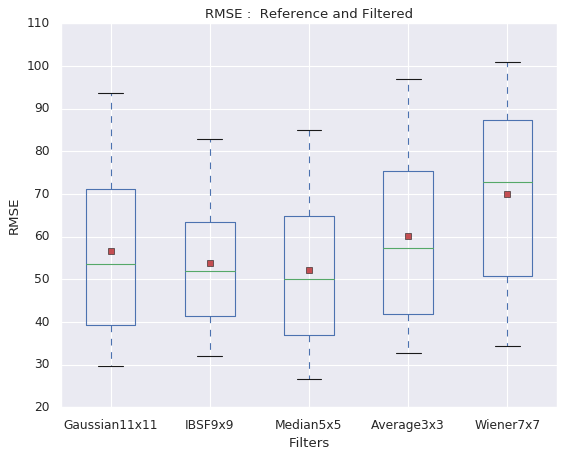

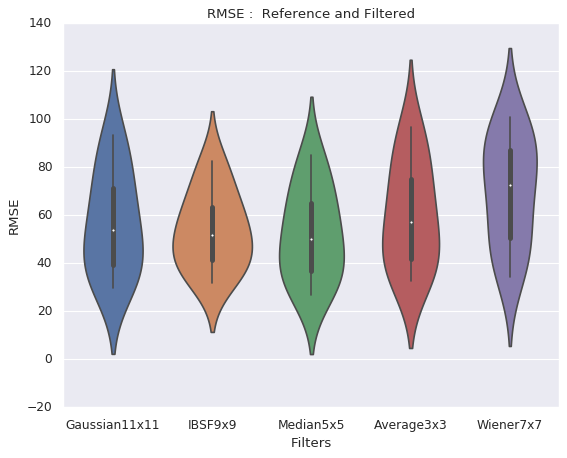

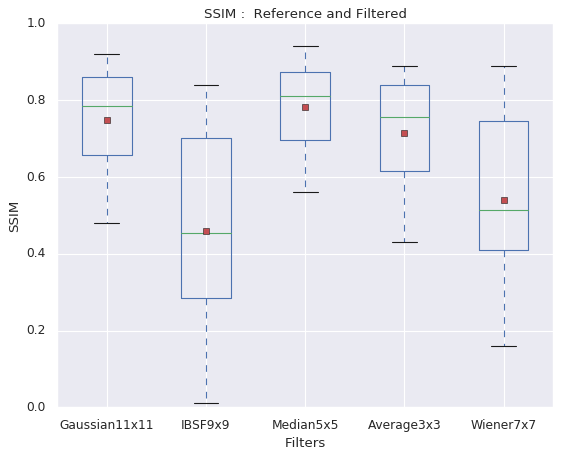

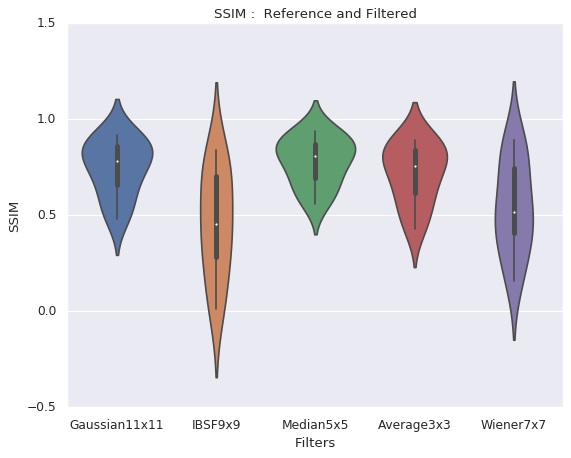

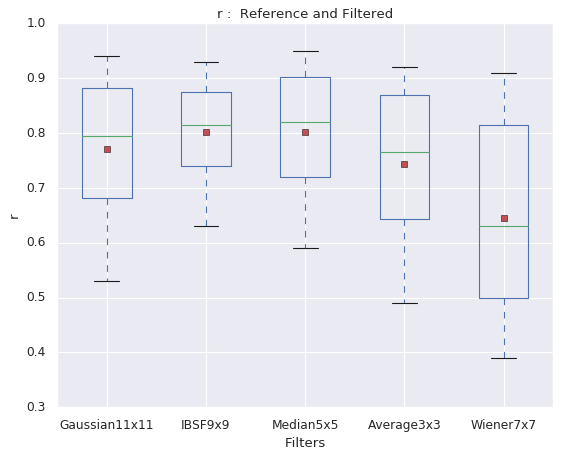

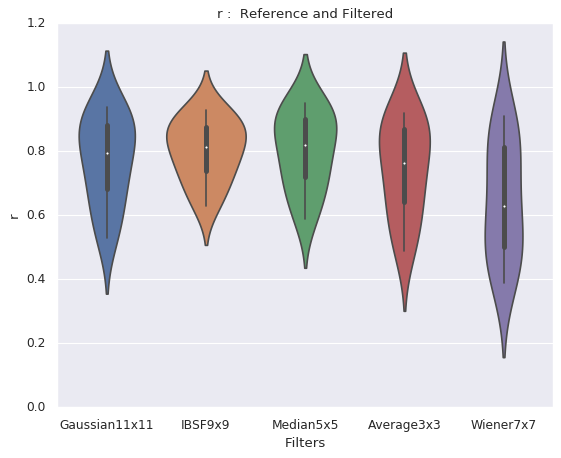

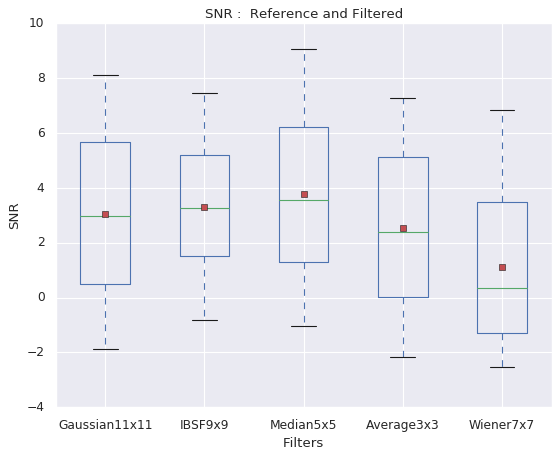

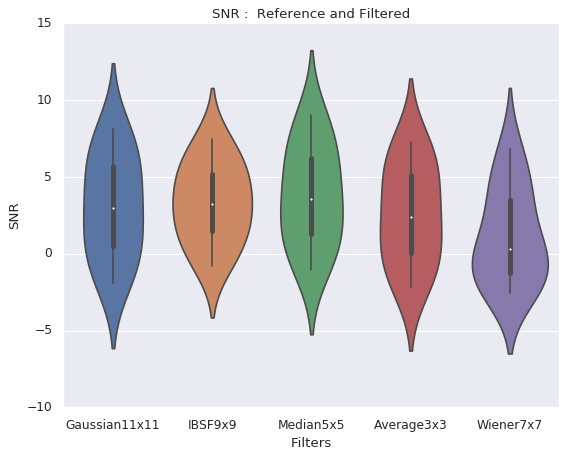

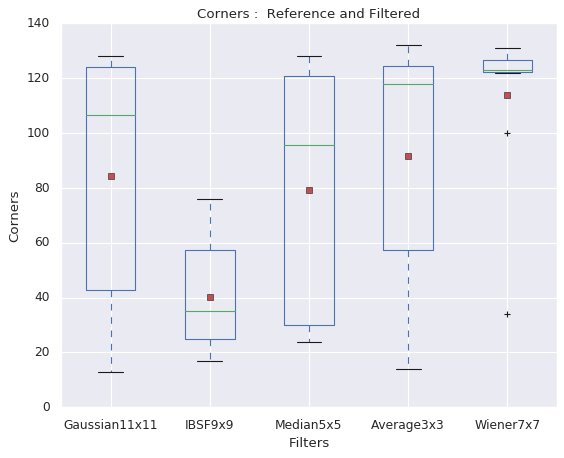

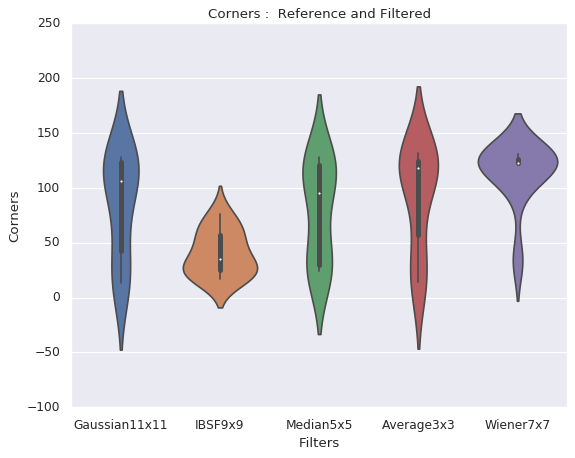

In [2]:
for i in range (0,5):
    dfm = pd.DataFrame()
    for filename in uploaded.keys():
        df = pd.read_csv(io.StringIO(uploaded[filename].decode("ISO-8859-1")), index_col = 0) # read the csv file
        df = df.head(10) # leave mean and stdDev out
        column = df.columns[i] # get current column name
        df = df[column] # get the column i of metric
        filtername = filename.split(sep = '.')[0]
        filtername = filtername.split(sep = '-')[-2] + filtername.split(sep = '-')[-1]
        dfm[filtername] = df # add column i in dfm
    
    images = "Reference and Filtered"; # "Original and Filtered"; # change for "Reference and Filtered"
    images2 = "-Reference-and-Filtered"; #"-Original-and-Filtered-images"; # change for "-Reference-and-Filtered"
    
    gtitle = ' '.join([column, ': ', images]) 
    plt.figure()
    plt.title(gtitle) # set title of the plot
    plt.xlabel("Filters") # display filters in x label
    plt.ylabel(column) # display metric in y label
    dfm.boxplot(showmeans=True) # plot boxplot
    figtitle = "-".join(["Boxplot-All-filters", column, images2]) # title of the figure that will be saved
    figtitle = ".".join([figtitle, "png"]) # add extension in figure name
    plt.savefig(figtitle) # save figure
    files.download(figtitle) # download figure

    plt.figure()
    plt.title(gtitle) # set title of the plot
    plt.xlabel("Filters") # display filters in x label
    plt.ylabel(column) # display metric in y label
    sns.violinplot(data = dfm) # plot vioplot 
    figtitle = "-".join(["Vioplot-All-filters", column, images2]) # title of the figure that will be saved
    figtitle = ".".join([figtitle, "png"]) # add extension in figure name
    plt.savefig(figtitle) # save figure
    files.download(figtitle) # download figure